#Heart Disease

##Diccionario de Datos

![texto alternativo](https://drive.google.com/uc?id=1MAv6FaCNK0YjjU1LEbJpv3z1Y4pii9SH)

##Importar Data

In [0]:
import pandas as pd

In [204]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##Data Train y Data Test

In [0]:
X=df.drop(['target'],axis=1)
y=df['target']

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=8)#5,8,13
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (242, 13)
X_test shape: (61, 13)


##Normalizar Data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [209]:
classifier.score(X_test,y_test)

0.8852459016393442

In [0]:
max_depth_range = list(range(2, 15))
accuracy_KNN = []
for depth in max_depth_range:
    classifier2 = KNeighborsClassifier(n_neighbors=depth,weights='distance',metric='euclidean')
    classifier2.fit(X_train, y_train)  
    score = classifier2.score(X_test, y_test)
    
    accuracy_KNN.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_KNN)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##Decision Tree

In [212]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [213]:
arbol.score(X_test,y_test)

0.8360655737704918

In [0]:
max_depth_range = list(range(2, 15)) #Reemplazar el max valor (15) con la máxima profundidad por defecto para su arbol +1
accuracy_arbol = []
for depth in max_depth_range:
    arbol2 = DecisionTreeClassifier(max_depth = depth)
    arbol2.fit(X_train,y_train) 
    score = arbol2.score(X_test, y_test)
    
    accuracy_arbol.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_arbol)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##Matriz de Confusión



> KNN



In [216]:
y_pred = classifier.predict(X_test)
df_confusion_KNN = pd.crosstab(y_test, y_pred,rownames=['Original'], colnames=['Predicted'])
df_confusion_KNN

Predicted,0,1
Original,,
0,20,2
1,5,34


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))



> Árbol de Clasificación



In [218]:
y_pred = arbol.predict(X_test)
df_confusion_arbol = pd.crosstab(y_test, y_pred,rownames=['Original'], colnames=['Predicted'])
df_confusion_arbol

Predicted,0,1
Original,,
0,16,6
1,4,35


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

##Graficando la Matriz 

In [0]:
#Función para mostrar la matriz de confusión
def print_confusion_matrix(cm):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix.')
  plt.show() 

In [0]:
print_confusion_matrix(df_confusion_KNN)

In [0]:
print_confusion_matrix(df_confusion_arbol)

##Cross Validation



> Árbol de Clasificación



In [223]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [224]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  arbol3 = DecisionTreeClassifier(max_depth=5)
  arbol3.fit(X_train,y_train)

  y_pred = arbol3.predict(X_test)
  AccFolder = metrics.accuracy_score(y_test, y_pred)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 67.74193548387096
Accuracy Folder 93.54838709677419
Accuracy Folder 87.09677419354838
Accuracy Folder 63.33333333333333
Accuracy Folder 86.66666666666667
Accuracy Folder 80.0
Accuracy Folder 76.66666666666667
Accuracy Folder 66.66666666666666
Accuracy Folder 63.33333333333333
Accuracy Folder 53.333333333333336
Accuracy General: 73.83870967741936


In [0]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(max_depth=deep)
    arbol3.fit(X_train,y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.grid()
plt.xticks(list(range(len(max_deep_list))),max_deep_list)
plt.ylabel('Score')
plt.xlabel('Cant de nodos')
plt.show()



> KNN



In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [227]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [228]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  classifier3 = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='cosine')
  classifier3.fit(X_train, y_train)

  y_pred = classifier3.predict(X_test)
  AccFolder = metrics.accuracy_score(y_test, y_pred)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 87.09677419354838
Accuracy Folder 77.41935483870968
Accuracy Folder 83.87096774193549
Accuracy Folder 73.33333333333333
Accuracy Folder 90.0
Accuracy Folder 83.33333333333334
Accuracy Folder 56.666666666666664
Accuracy Folder 83.33333333333334
Accuracy Folder 80.0
Accuracy Folder 60.0
Accuracy General: 77.50537634408602


In [0]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

for deep in max_deep_list:
    classifier3 = KNeighborsClassifier(n_neighbors=deep,weights='distance',metric='euclidean')
    classifier3.fit(X_train, y_train)
    train_prec.append(classifier3.score(X_train, y_train))
    eval_prec.append(classifier3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste KNN')
plt.legend()
plt.grid()
plt.xticks(list(range(len(max_deep_list))),max_deep_list)
plt.ylabel('Score')
plt.xlabel('Cant de nodos')
plt.show()

##Curva ROC

In [235]:
X=df.drop(['target'],axis=1)
y=df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=8)#5,8,13
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train shape: (242, 13)
X_test shape: (61, 13)




> KNN



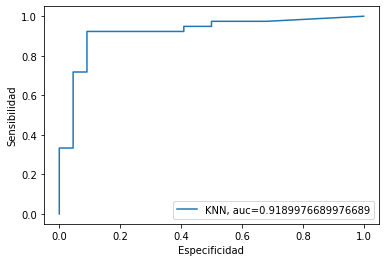

In [240]:
# Cálculo del AUC y gráfica de la Curva ROC
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.xlabel("Especificidad")
plt.ylabel("Sensibilidad")
plt.legend(loc=4)
plt.show()



> Árbol de Clasificación



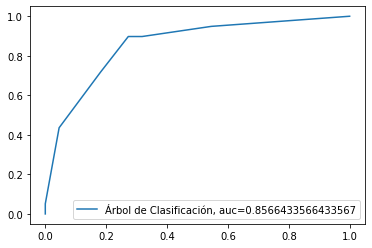

In [238]:
# Cálculo del AUC y gráfica de la Curva ROC
y_pred_proba = arbol.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Árbol de Clasificación, auc="+str(auc))
plt.legend(loc=4)
plt.show()